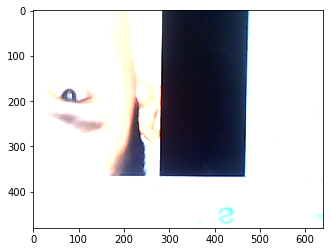

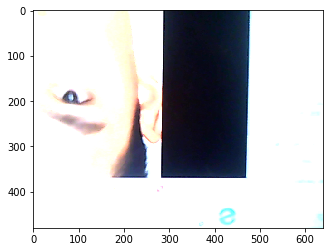

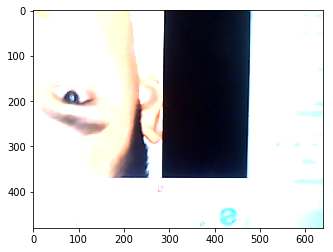

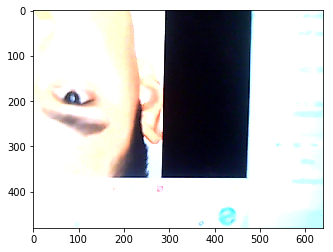

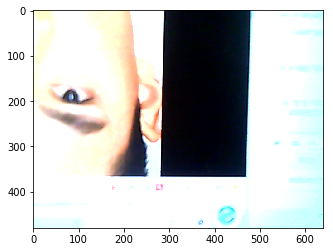

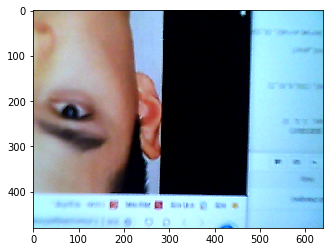

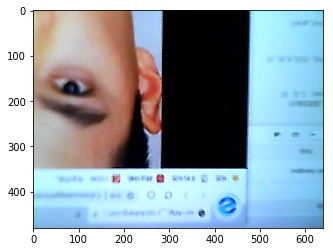

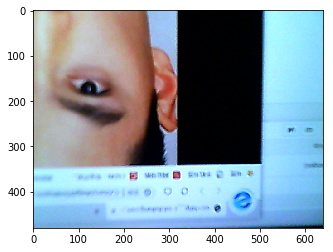

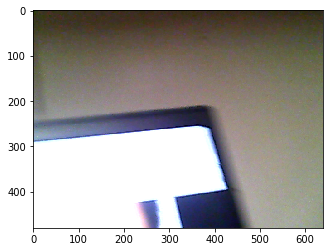

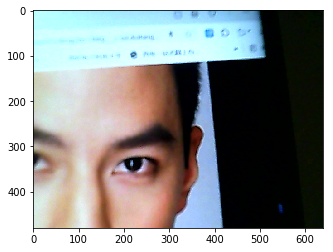

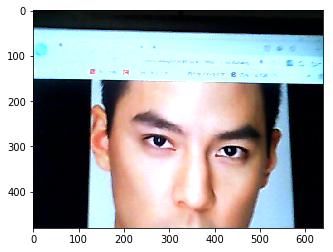

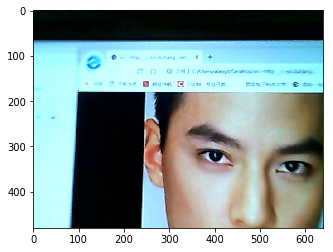

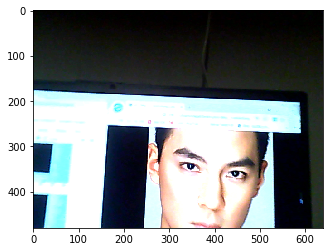

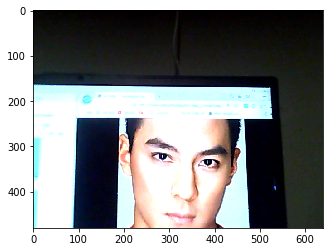

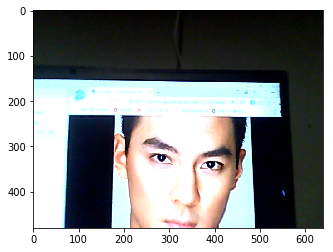

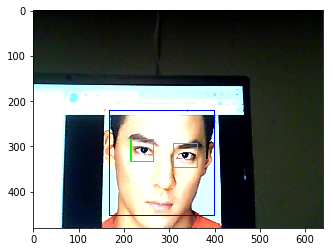

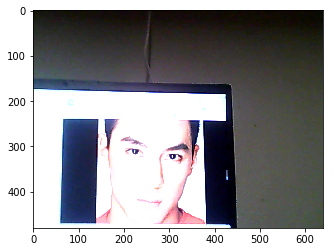

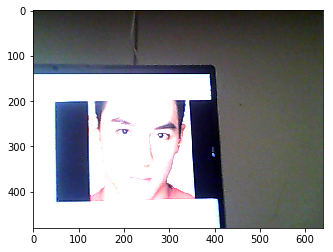

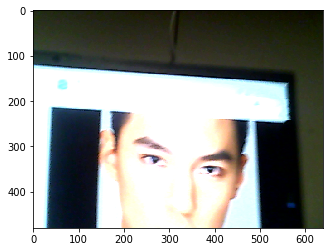

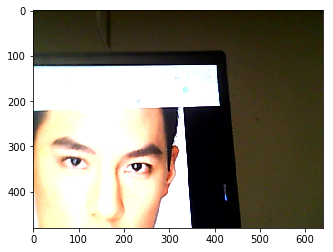

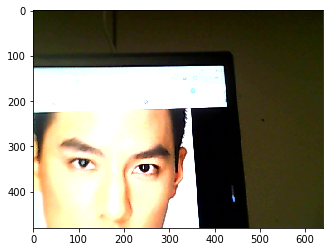

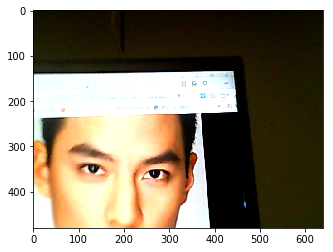

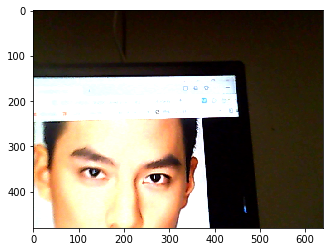

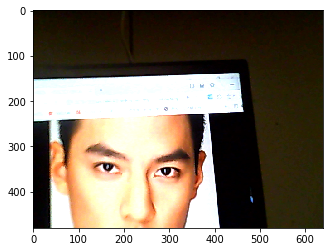

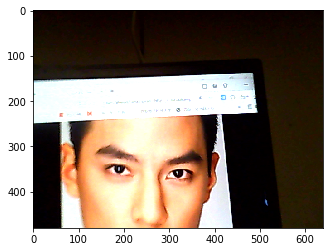

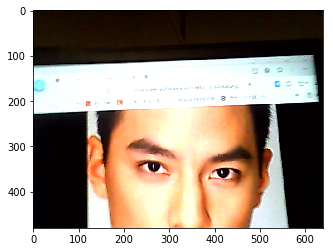

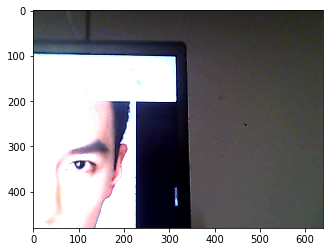

In [ ]:
import cv2
from matplotlib import pyplot as plt
# 使用OpenCv打开摄像头
cap = cv2.VideoCapture()
cap.open(0)
while True:
    # 摄像头开始采集，若采集到数据，返回值rect为1，否则为0，frame为返回的对象
    ret, frame = cap.read()
    np_frame = frame
    # 进行人脸的数据的导入
    face_cascade = cv2.CascadeClassifier(
                            './haarcascade_frontalface_default.xml')
    #进行眼睛数据的导入
    eye_cascade = cv2.CascadeClassifier(
                            './haarcascade_eye.xml')
    
    # 进行图像的灰度处理
    gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # 进行人脸检测和眼睛的检测
    for (x,y,w,h) in faces:
        cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = np_frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


    # 将OpenCv处理的结构打印出来
    %matplotlib inline 
    from matplotlib import pyplot as plt
    import numpy as np
    plt.imshow(np_frame[:,:,[2,1,0]])
    plt.show()
    
# 销毁窗口释放内存
cv2.destroyAllWindows()
cap.release()